<a href="https://colab.research.google.com/github/LM1997610/NeuralNetworks/blob/main/ARIS_hw_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip -q install powerlaw

In [26]:

import os
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from tqdm import tqdm

# import powerlaw as pwl

## Problem 1:

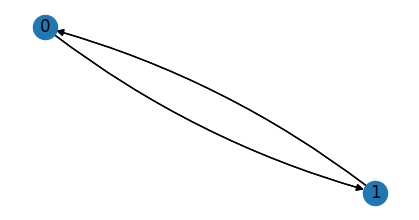

In [ ]:
G = nx.MultiDiGraph()

G.add_node('0')
G.add_node('1')

G.add_edge('0', '1')
G.add_edge('0', '1')
G.add_edge('1', '0')
G.add_edge('1', '0')

pos = nx.spring_layout(G)

plt.figure(figsize=(4, 2))

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

edge_labels=dict([((u,v,))
             for u,v,d in G.edges(data=True)])

plt.show()

In [ ]:
def prob_each_node(graph, time, l=4, c=0):

  degrees = dict(graph.degree())
  denominator = (time - 1)*(2*l + c)
  my_prob_list = [(x+c)/denominator for x in list(degrees.values())]

  return my_prob_list

In [ ]:
times = range(2, 10000)

for t in tqdm(times):
  G.add_node('node_'+str(t))
  prob_vector = prob_each_node(G, time=t, l=4, c=7)

  selected_nodes = random.choices(list(G.nodes()), weights=prob_vector, k=4)

  for node in selected_nodes:
    G.add_edge('node_'+str(t), node)


100%|██████████| 9998/9998 [03:18<00:00, 50.32it/s]


In [ ]:
def plot_degree_histogram(g, normalized=True):

    aux_y = nx.degree_histogram(g)
    aux_x = np.arange(0,len(aux_y)).tolist()

    n_nodes = g.number_of_nodes()

    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes

    return aux_x, aux_y

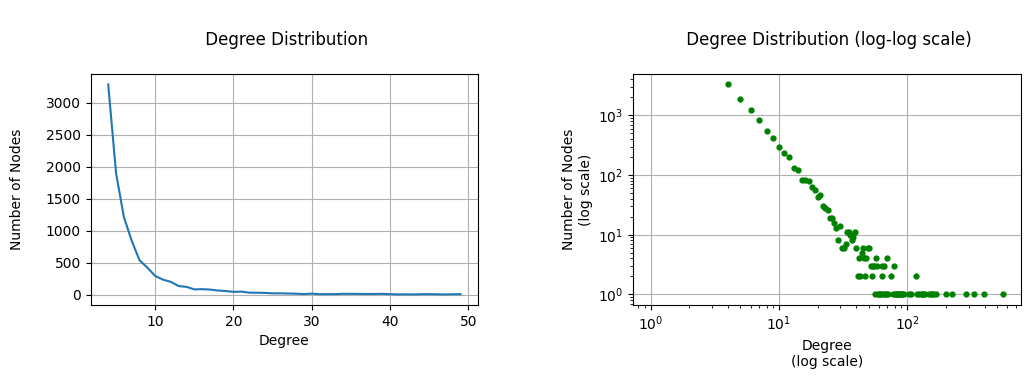

In [ ]:
aux_x, aux_y = plot_degree_histogram(G, normalized=False)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 3))


ax1.plot(aux_x[4:50], aux_y[4:50], '-')
ax1.set_title('\n Degree Distribution\n')
ax1.set_xlabel('Degree\n')
ax1.set_ylabel('Number of Nodes\n')
ax1.grid()



ax2.plot(aux_x, aux_y, 'o', markersize=3.5, color='green')
ax2.set_title('\n Degree Distribution (log-log scale)\n')
ax2.set_xlabel('Degree\n(log scale)')
ax2.set_ylabel('Number of Nodes\n(log scale)')
ax2.set_xscale("log"); ax2.set_yscale("log")
ax2.grid()

plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
def my_power_law(deg_lista, l=4, c=0):

  with np.errstate(divide='ignore', invalid='ignore'):
    a = 2*l*(l+1)
    p_k = a*np.array(deg_lista)**(-(3+c/l))
  return deg_lista, p_k

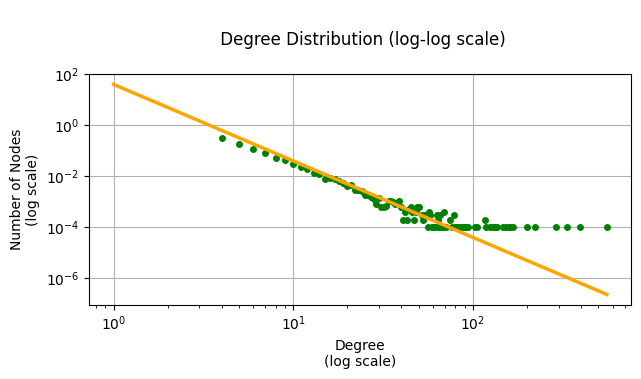

In [ ]:
plt.figure(figsize=(7, 3))

aux_x, aux_y = plot_degree_histogram(G, normalized = True)
plt.plot(aux_x, aux_y, 'o', markersize=4, color="green")

k, p_k = my_power_law(aux_x, c=0)
plt.plot(k[1:], p_k[1:], '-', color="orange", linewidth=2.5)

plt.title('\n Degree Distribution (log-log scale)\n')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log"); plt.yscale("log")


plt.grid()

## Problem 2:


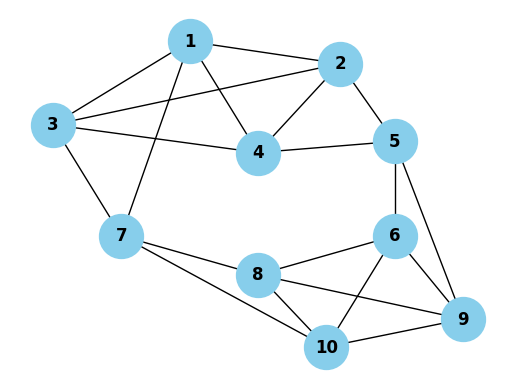

In [27]:
G = nx.Graph()

number_of_nodes = 10
nodes = range(1, number_of_nodes+1)
G.add_nodes_from(nodes)

edges = [(1, 2), (1, 3), (1, 4), (1,7),
         (2, 3), (2, 4), (2,5),
         (3, 4), (3,7),
         (4, 5),
         (5, 6), (5,9),
         (6, 8), (6, 9), (6, 10),
         (7, 8), (7, 10),
         (8, 9), (8, 10),
         (9, 10),
         #(11,3), (12,11), (11,8), (1,12),(11,9)
         ]

G.add_edges_from(edges)


fixed_positions = {1:(2, 5.5), 2:(3.1, 5.1), 3:(1, 4), 4:(2.5, 3.5), 5:(3.5, 3.7),
                   6:(3.5, 2), 7:(1.5, 2), 8:(2.5, 1.3), 9:(4, 0.5), 10:(3, 0)}

fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)

fig, ax = plt.subplots()
nx.draw(G,with_labels=True, node_color='skyblue', node_size=1000, font_size=12, font_color='black', font_weight='bold', ax=ax, pos=pos)

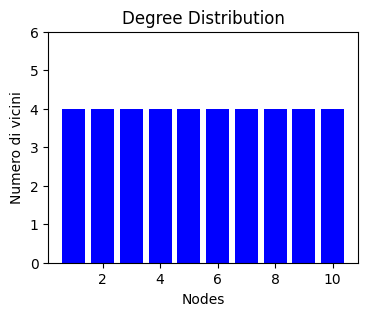

In [28]:
d_distrib = dict(G.degree())

fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(d_distrib.keys(), d_distrib.values(), width=0.8, color='b')
ax.set_xlabel('Nodes')
ax.set_ylabel("Numero di vicini")
ax.set_title('Degree Distribution')
ax.set_ylim(0,6)
plt.show()

In [29]:
def GreedyDensestSubgraph(Graph):

    print(f"Nodes in G: {set(G.nodes())}\n")

    S = set(Graph.nodes())
    sub_graph = set(Graph.nodes())
    while len(S) > 1:

        v_node = min(S, key=lambda v: Graph.degree(v))
        S.remove(v_node)

        density_S = len(Graph.subgraph(S).edges()) / len(S)
        density_subgraph = len(Graph.subgraph(sub_graph).edges()) / len(sub_graph)

        if density_S >= density_subgraph:
          sub_graph = set(S)
          print(f" removed node: {str(v_node)}")

    print(f"\n Densest SubGraph: {sub_graph}")
    return sub_graph

In [30]:
densest_sgraph = GreedyDensestSubgraph(G)

Nodes in G: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


 Densest SubGraph: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


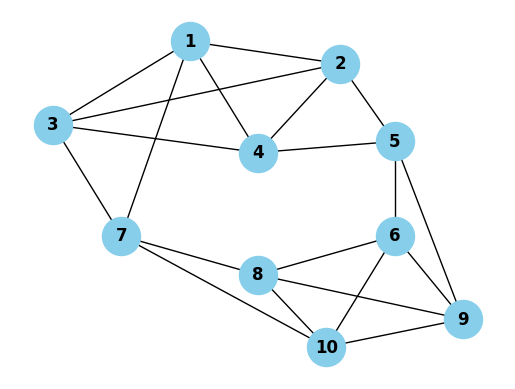

In [31]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(G, pos, nodelist =  set(G.nodes())- densest_sgraph, node_color='red', node_size=700, alpha = 0.15)
nx.draw_networkx_nodes(G, pos, nodelist=densest_sgraph, node_size=750, node_color='skyblue')

nx.draw_networkx_edges(G, pos, ax=ax)
text = nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', font_weight='bold')

_ = ax.axis('off')

In [32]:
adj_matrix = nx.to_numpy_array(G)
adj_matrix

array([[0., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.]])

In [33]:
def Sparsest_Cut(A_matrix, grafo=False):

  D = np.eye(A_matrix.shape[0])

  normalized_laplacian_matrix = D - A_matrix/4  # L = I − 1/d * A

  eigenvalues, eigenvectors = np.linalg.eig(normalized_laplacian_matrix)
  vector = eigenvectors[:,1]

  sorted_indices = np.argsort(vector)
  sorted_values = vector[sorted_indices]

  c_one = [sorted_indices[x] for x in range(len(sorted_indices)) if sorted_values[x] > 0]
  c_two = [sorted_indices[x] for x in range(len(sorted_indices)) if sorted_values[x] < 0]

  # --- Cheeger’s inequality --- #

  lambda_2 = eigenvalues[1]

  conductance = nx.conductance(grafo, S =c_one, T=c_two)

  if (lambda_2/2 <= conductance) and (conductance <= np.sqrt(lambda_2*2)):

    print("Cheeger’s inequality holds:", end = " ")
    print(f"{np.round(lambda_2/2, 3).real} <= {conductance} <= {np.round(np.sqrt(lambda_2*2), 3).real}")

  return c_one, c_two

In [37]:
6/16

0.375

In [34]:
c1, c2 = Sparsest_Cut(adj_matrix, grafo = G)

Cheeger’s inequality holds: 0.625 <= 0.875 <= 1.581


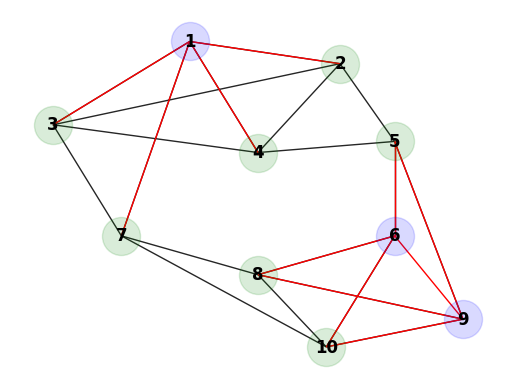

In [35]:
fig, ax = plt.subplots()

nodi_1 = [x+1 for x in c1]
nodi_2 = [x+1 for x in c2]

#pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, nodelist = nodi_1, node_size=750, alpha = 0.15, node_color='green', pos = pos)
nx.draw_networkx_nodes(G, nodelist = nodi_2, node_size=750, alpha = 0.15, node_color='blue', pos = pos)

nx.draw_networkx_edges(G, edgelist= [(u,v) for u,v in G.edges(nodi_1)], edge_color = "black", alpha=0.85, pos=pos)
nx.draw_networkx_edges(G, edgelist= [(u,v) for u,v in G.edges(nodi_2)], edge_color = "red", pos=pos)
text = nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', font_weight='bold')

_ = ax.axis('off')

Cheeger’s inequality holds: 0.842 <= 1.0 <= 1.835


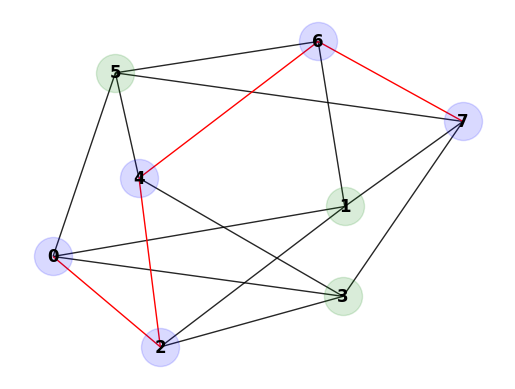

In [36]:
A = np.array([[0, 1, 1, 1, 0, 1, 0, 0],
              [1, 0, 1, 0, 0, 0, 1, 1],
              [1, 1, 0, 1, 1, 0, 0, 0],
              [1, 0, 1, 0, 1, 0, 0, 1],
              [0, 0, 1, 1, 0, 1, 1, 0],
              [1, 0, 0, 0, 1, 0, 1, 1],
              [0, 1, 0, 0, 1, 1, 0, 1],
              [0, 1, 0, 1, 0, 1, 1, 0]])

gg = nx.from_numpy_array(A)

c1, c2 = Sparsest_Cut(A, grafo = gg)

fig, ax = plt.subplots()

pos = nx.spring_layout(gg)
nx.draw_networkx_nodes(gg, nodelist = c1, node_size=750, alpha = 0.15, node_color='green', pos = pos)
nx.draw_networkx_nodes(gg, nodelist = c2, node_size=750, alpha = 0.15, node_color='blue', pos = pos)
nx.draw_networkx_edges(gg, edgelist= [(u,v) for u,v in gg.edges(c1)], edge_color = "black", alpha=0.85, pos=pos)
nx.draw_networkx_edges(gg, edgelist= [(u,v) for u,v in gg.edges(c2) if u in c2 and v in c2], edge_color = "red", pos=pos)
text = nx.draw_networkx_labels(gg, pos, font_size=12, font_color='black', font_weight='bold')

_ = ax.axis('off')

## Problem 3:
An interesting phenomenon in **social networks** is
that a random person’s expected degree is smaller than the degree of her peers:\
` Your friends are more popular than you are!` \
Given an undirected graph G = (V,E), select a random node and let X be the random variable that equals to its degree and Y to be the random variable that equals
the average degree of the node’s neighbors.



## Problem 4:

In [17]:
from collections import defaultdict
from IPython.display import Image

from helper import check_add_edge, do_plot, do_gif

In [18]:
folder_path = "graph_status"
os.makedirs(folder_path, exist_ok=True)

stream_edge = [("c","e"), ("b","d"), ("a","c"), ("c","b"), ("a","b"),
                ("c","d"), ("d","e"), ("b","e"), ("b","d"), ("c","e")]

In [24]:
F = []
arrival_time = {}
window_size = 7

window = []
is_disconnected = False

times = range(0, 10)
for t in times:

    if t < len(stream_edge):
        new_edge = stream_edge[t]

    else:
        u = random.choice("abcdefg")
        v = random.choice("abcdefg")
        new_edge = (u,v)

        while check_add_edge(u,v, F) == False:
            u = random.choice("abcdefg")
            v = random.choice("abcdefg")
            new_edge = (u,v)

    print(f" t:{t+1} - arrived: {new_edge}", end ="")

    arrival_time[new_edge] = t
    F = [new_edge] + F
    window.append(new_edge)
    cycle_path = has_cycle(F)

    if cycle_path:

        #print(f"cycle: {cycle_path}", end='')
        edge_path = [(cycle_path[i], cycle_path[i+1]) for i in range(len(cycle_path) - 1)] + [(cycle_path[-1], cycle_path[0])]
        loop = [t if t in F else (t[1], t[0]) for t in edge_path]

        oldest_edge_time = min(arrival_time[key] for key in  loop)
        oldest_edge = [key for key in  loop if arrival_time[key] == oldest_edge_time][0]
        print(f" → removed: {oldest_edge} from t={oldest_edge_time}")

        F.remove(oldest_edge)
        arrival_time.pop(oldest_edge)
        #do_plot(F, window, t+1)

    if t >= window_size:
        window.pop(0)

    if t - window_size+1 > min(arrival_time.values()) or t-window_size < 0:
        is_disconnected = True
        print("\tis Disconnected !")
        #print("\tis Disconnected !", t - window_size+1, min(arrival_time.values()))

    do_plot(F, window, t+1,folder_path, discon = is_disconnected)

do_gif(folder_path, times)

 t:1 - arrived: ('c', 'e')	is Disconnected !
 t:2 - arrived: ('b', 'd')	is Disconnected !
 t:3 - arrived: ('a', 'c')	is Disconnected !
 t:4 - arrived: ('c', 'b')	is Disconnected !
 t:5 - arrived: ('a', 'b') → removed: ('a', 'c') from t=2
	is Disconnected !
 t:6 - arrived: ('c', 'd') → removed: ('b', 'd') from t=1
	is Disconnected !
 t:7 - arrived: ('d', 'e') → removed: ('c', 'e') from t=0
	is Disconnected !
 t:8 - arrived: ('b', 'e') → removed: ('c', 'b') from t=3
 t:9 - arrived: ('b', 'd') → removed: ('d', 'e') from t=6
 t:10 - arrived: ('c', 'e') → removed: ('c', 'd') from t=5


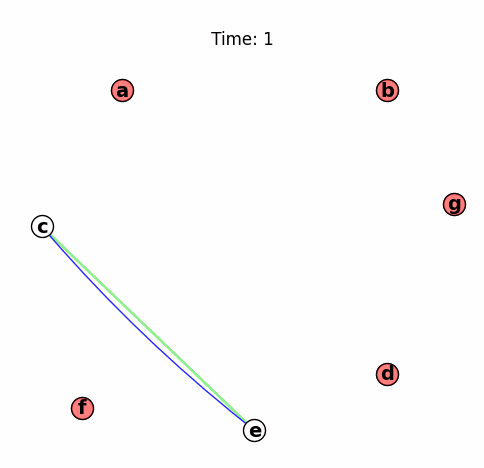

In [23]:
Image(open('movie_2.gif','rb').read())

In [5]:
def has_cycle(edges):

    adj = defaultdict(set)
    path = []
    for x, y in edges:
        adj[x].add(y)
        adj[y].add(x)

    col = defaultdict(int)
    parent = {}

    def dfs(x, p):
        col[x] = 1
        parent[x] = p

        for y in adj[x]:
            if col[y] == 0:
                if dfs(y, x):
                    return True
            elif col[y] == 1 and parent[x] != y:
                #print(f"cycle found: {y} -> ", end='')
                node = x
                path.append(y)
                while node != y:
                    #print(f"{node} -> ", end='')
                    path.append(node)
                    node = parent[node]
                #print(f"{y} |", end='')
                return path
        col[x] = 2
        return None

    for x in adj:
        if col[x] == 0:
            if(dfs(x, None)) == True:
                return path
    return False

